<a href="https://colab.research.google.com/github/TSZJHLR/Data-Analytics-and-Machine-Learning/blob/main/group/DAML_ITS69304_Lab3Group6_GROUPASGNMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Group Assignment - CASE STUDY ON TRAVEL AND TOURISM | TREKKING IN NEPAL]

> ITS69304 - Data Analytics & Machine Learning

> ## <span style="color:blue">Import</span>

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import re

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Mount drive if necessary

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

> ## <span style="color:blue">Data Loading</span>


In [ ]:
df = pd.read_csv("/content/Nepali_Trekking_.csv")

### display max columns

In [ ]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

### sample

In [ ]:
display(df.sample(3))

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date Of Travel,Sex,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,RegionalCode,Country,FitnessLevel,Weather Conditions,Trekking Group Size,Guide No Guide,Equipment Used,Purpose Of Travel,Health Incidents,Review Satisfaction
376,376,Annapurna Circuit Trek,$1100 USD,19 Days,Moderate-Hard,"5,416m",Hotel/Guesthouse,Jan - May & Sept - Dec,12/19/2020,Male,31,Government Sector,Yes,1300000,4,0,No,No,0,2016,7520,Sweden,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
6,6,Gokyo Lake Renjo La Pass Trek,"\n$1,450 USD",16 Days,Moderate,5360 m,Hotel/Guesthouse,March - May & Sept - Dec.,8/7/2022,Male,31,Government Sector,Yes,1300000,4,0,No,No,0,2017,280,Antigua Berbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,276,Everest View Trek,"$1,499 USD",12 Days,Light+Moderate,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,7/6/2020,Female,29,Private Sector/Self Employed,Yes,1050000,6,0,No,No,0,2016,3280,Gaiana,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0


> ## <span style="color:blue"> Data Preprocessing </span>

> ### <span style="color:blue">Cleaning</span>

#### iloc

In [ ]:
df.iloc[:0]

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date Of Travel,Sex,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,RegionalCode,Country,FitnessLevel,Weather Conditions,Trekking Group Size,Guide No Guide,Equipment Used,Purpose Of Travel,Health Incidents,Review Satisfaction


In [ ]:
df = df.set_index('Unnamed: 0')

#### is na sum

In [ ]:
display(df.isna().sum())

,0
Trek,0
Cost,0
Time,0
Trip Grade,0
Max Altitude,0
Accomodation,0
Best Travel Time,0
Date Of Travel,0
Sex,0
Age,0


#### info

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 382
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trek                 383 non-null    object 
 1   Cost                 383 non-null    object 
 2   Time                 383 non-null    object 
 3   Trip Grade           383 non-null    object 
 4   Max Altitude         383 non-null    object 
 5   Accomodation         383 non-null    object 
 6   Best Travel Time     383 non-null    object 
 7   Date Of Travel       383 non-null    object 
 8   Sex                  383 non-null    object 
 9   Age                  383 non-null    int64  
 10  Employment Type      383 non-null    object 
 11  GraduateOrNot        383 non-null    object 
 12  AnnualIncome         383 non-null    int64  
 13  FamilyMembers        383 non-null    int64  
 14  ChronicDiseases      383 non-null    int64  
 15  FrequentFlyer        383 non-null    object 


None

#### drop duplicate

In [ ]:
df.drop_duplicates(inplace=True)

#### describe

In [ ]:
display(df.describe())

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Year,RegionalCode,Trekking Group Size,Review Satisfaction
count,383.000000,3.830000e+02,383.000000,383.000000,383.000000,383.000000,383.000000,345.000000,345.000000
mean,29.673629,9.492167e+05,4.843342,0.268930,0.344648,2025.519582,4081.302872,8.246377,4.010145
std,2.868042,3.720953e+05,1.667836,0.443983,0.475875,175.953867,2432.427473,2.584647,0.713684
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000,2016.000000,0.000000,5.000000,3.000000
25%,28.000000,6.500000e+05,4.000000,0.000000,0.000000,2016.000000,2030.000000,6.000000,3.500000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000,2017.000000,4140.000000,8.000000,4.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000,2017.000000,6080.000000,10.000000,4.500000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000,5460.000000,9990.000000,12.000000,5.000000


#### lower case + snake format

In [ ]:
def format_column(col):
    col = re.sub(r'\s+', '', col)
    col = re.sub('(?<!^)(?=[A-Z])', '_', col).lower()
    return col

df.columns = [format_column(col) for col in df.columns]
print(df.columns)

Index(['trek', 'cost', 'time', 'trip_grade', 'max_altitude', 'accomodation',
       'best_travel_time', 'date_of_travel', 'sex', 'age', 'employment_type',
       'graduate_or_not', 'annual_income', 'family_members',
       'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad',
       'travel_insurance', 'year', 'regional_code', 'country', 'fitness_level',
       'weather_conditions', 'trekking_group_size', 'guide_no_guide',
       'equipment_used', 'purpose_of_travel', 'health_incidents',
       'review_satisfaction'],
      dtype='object')


#### `For 'Trek' column`

In [ ]:
df = df.sort_values(by='trek', ascending=True)
df['trek'] = df['trek'].str.replace('\xa0', '').str.lower()

In [ ]:
trek = df['trek'].unique()

for i in trek:
    print(i)

annapurna base camp heli trek
annapurna base camp short trek
annapurna base camp trek
annapurna circle trek
annapurna circuit short trek
annapurna circuit trek
annapurna circuit trek with tilicho lake and poon hill
annapurna luxury trek
annapurna panorama trek
annapurna sanctuary trek
annapurna sunrise and everest view trek
annapurna tilicho lake trek
annapurna with tilicho lake trek
classic annapurna circuit trek
everest advanced base camp trek from tibet
everest base camp heli shuttle trek
everest base camp heli trek
everest base camp luxury lodge trek
everest base camp short trek
everest base camp trek
everest base camp trek for seniors
everest base camp trek for youths
everest base camp trek via gokyo lake
everest base camp trek via gokyo lakes and cho la pass
everest base camp trek with chola and renjo la pass
everest chola pass trek
everest high passes trek
everest kalapathar trekking
everest kangshung face trek
everest panorama trek
everest view trek
ghorepani poon hill trek
gok

#### `For 'Cost' column`

In [ ]:
df['cost'] = df['cost'].str.replace(r"\W|\D|\s", "", regex=True).astype('float32')

In [ ]:
print(df['cost'].unique())

[1750. 1090. 1499. 1250. 1100. 1450.  860. 1350. 2000. 3600. 3300. 1295.
 1420. 1800. 1530. 1900. 1720. 1950. 1390. 1040. 1150.  450. 1190.  780.
  980. 1180.  750.  690. 4200. 1380.  590.  850. 1060.  920. 1850. 2150.
 2100. 2300.]


In [ ]:
display(df['cost'].value_counts())

,count
cost,
1499.0,180
1450.0,21
1090.0,15
2150.0,10
1190.0,10
750.0,10
590.0,10
1750.0,10
1250.0,10


In [ ]:
df.rename(columns={'cost': 'cost_in_usd'}, inplace=True)

In [ ]:
exchange_rate = 134.20  # 1 USD to NPR as of Oct 27, 2023
df['cost_in_npr'] = df['cost_in_usd'] * exchange_rate

#### `For 'Time' column`

In [ ]:
df['time'] = df['time'].apply(lambda x: re.sub(r'\b[Dd]ays?\b', '', x)).astype(int)

In [ ]:
print(df['time'].unique())

[ 9 11 14 16 12 19 20 17 18 15 21 22 10 13 25  8  7  5 27]


In [ ]:
df.rename(columns={'time': 'time_in_days'}, inplace=True)

#### `For 'Max Altitude' column`

In [ ]:
df['max_altitude'] = df['max_altitude'].str.replace(r'm|,','', regex=True)

In [ ]:
df['max_altitude'] = df['max_altitude'].str.replace(' ', '')

In [ ]:
print(df['max_altitude'].unique())

['4210' '4130' '5416' '2012' '3210' '3870' '6340' '5545' '5546' '5320'
 '3860' '5360' '5357' '3650' '4230' '5143' '4500' '4600' '5050' '5122'
 '4773' '5000' '4870' '5106' '5220' '5160' '4200' '3540' '1550' '3055'
 '1990' '3900' '2607' '1730' '6000' '4460']


In [ ]:
df['max_altitude'].value_counts()

,count
max_altitude,
5545,64
5416,55
4210,25
4200,20
3870,20
3210,15
5220,15
4130,15
5357,10


In [ ]:
df['max_altitude'] = df['max_altitude'].astype("float32")

#### `For 'Trip Grade' column`

In [ ]:
print(df['trip_grade'].unique())

['Easy To Moderate' 'Moderate' 'Moderate+Demanding' 'Demanding'
 'Strenuous' 'Moderate-Hard' 'Easy' 'Demanding+Challenging'
 'Easy-Moderate' 'Light+Moderate' 'Light']


In [ ]:
df['trip_grade'].value_counts()

,count
trip_grade,
Moderate,92
Demanding,75
Easy To Moderate,58
Moderate+Demanding,40
Moderate-Hard,30
Easy,25
Strenuous,23
Demanding+Challenging,20
Easy-Moderate,10


In [ ]:
df['trip_grade'] = pd.cut(df['max_altitude'],
                                  bins=[-np.inf, 3500, 4500, np.inf],
                                  labels=['Easy', 'Moderate', 'Difficult'])

In [ ]:
df.sample(4)

,trek,cost_in_usd,time_in_days,trip_grade,max_altitude,accomodation,best_travel_time,date_of_travel,sex,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,year,regional_code,country,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,cost_in_npr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
177,upper mustang trek,2150.0,17,Moderate,4210.0,Hotel/Guesthouse,March - May & Sept - Nov.,5/10/2022,Female,28,Private Sector/Self Employed,Yes,1250000,5,0,No,No,0,2017,7640,Thailand,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,288530.0
311,instant annapurna base camp trek,980.0,9,Moderate,4230.0,Hotel/Guest Houses,March - May & Sept - Dec.,12/18/2022,Transgender,34,Private Sector/Self Employed,Yes,1500000,7,0,Yes,Yes,1,2016,4500,Madagascar,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,131516.0
302,annapurna circuit trek,1100.0,19,Difficult,5416.0,Hotel/Guesthouse,Jan - May & Sept - Dec,6/10/2021,Female,34,Private Sector/Self Employed,Yes,700000,6,0,No,No,1,2016,4260,Lesot,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,147620.0
251,upper mustang trek,2150.0,17,Moderate,4210.0,Hotel/Guesthouse,March - May & Sept - Nov.,7/26/2023,Female,28,Government Sector,Yes,300000,5,0,No,No,0,2016,2040,Benan,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,288530.0


#### `For 'Accommodation' column`

In [ ]:
df['accomodation'].value_counts()

,count
accomodation,
Hotel/Guesthouse,312
Hotel/Teahouses,30
Hotel/Teahouse,11
Hotel/Lodges,10
Hotel/Luxury Lodges,5
Hotel/Guest Houses,5
Hotel/Guesthouses,5
Teahouses/Lodges,5


#### `For 'Best Travel Time' column`

In [ ]:
df['best_travel_time'].unique()

array(['March - May & Sept - Dec', 'Jan - May & Sept - Dec',
       'March - May & Sept - Nov.', 'March-May & Sept-Dec',
       'March - May & Setpt - Dec', 'March - May & Sept - Nov',
       'April - May & Sept - Nov', 'March - May & Sept - Dec.',
       'Jan - May & Sept- Dec', 'March-May & Sept-Dec.',
       'March - May & Setpt - Nov', 'Jan- May & Sept - Dec',
       'March - Nov'], dtype=object)

In [ ]:
def clean_travel_time(value):
  value = value.replace(".", "")
  value = value.replace("March", "Mar")
  value = value.replace("April", "Apr")
  value = value.replace("Setpt", "Sep")
  value = value.replace("Sept", "Sep")
  value = value.replace(" ", "")
  value = re.sub(r'(\w+)-(\w+)', r'\1 - \2', value)
  value = re.sub(r'&(\w+)', r' & \1', value)
  return value

df['best_travel_time'] = df['best_travel_time'].apply(clean_travel_time)

print(df['best_travel_time'].unique())

['Mar - May & Sep - Dec' 'Jan - May & Sep - Dec' 'Mar - May & Sep - Nov'
 'Apr - May & Sep - Nov' 'Mar - Nov']


In [ ]:
a = df['best_travel_time'].unique()

for i in a:
    print(i)

Mar - May & Sep - Dec
Jan - May & Sep - Dec
Mar - May & Sep - Nov
Apr - May & Sep - Nov
Mar - Nov


In [ ]:
df['best_travel_time'].value_counts()

,count
best_travel_time,
Jan - May & Sep - Dec,272
Mar - May & Sep - Dec,64
Mar - May & Sep - Nov,41
Mar - Nov,5
Apr - May & Sep - Nov,1


#### `For 'Date of Travel' column`

In [ ]:
df['date_of_travel'] = pd.to_datetime(df['date_of_travel'], errors='coerce')

df['date_of_travel'] = df['date_of_travel'].dt.strftime('%m-%d-%y')

df['date_of_travel'] = pd.to_datetime(df['date_of_travel'], format='%m-%d-%y')

In [ ]:
df['date_of_travel'].unique()

<DatetimeArray>
['2023-08-07 00:00:00', '2023-05-27 00:00:00', '2022-05-07 00:00:00',
 '2022-10-07 00:00:00', '2022-06-24 00:00:00', '2023-06-04 00:00:00',
 '2023-05-19 00:00:00', '2020-10-04 00:00:00', '2021-05-10 00:00:00',
 '2022-03-17 00:00:00',
 ...
 '2023-04-19 00:00:00', '2022-10-14 00:00:00', '2020-02-01 00:00:00',
 '2022-07-23 00:00:00', '2023-03-17 00:00:00', '2022-09-12 00:00:00',
 '2022-05-22 00:00:00', '2021-09-29 00:00:00', '2023-03-12 00:00:00',
 '2021-10-13 00:00:00']
Length: 332, dtype: datetime64[ns]

#### `For 'Sex' column`

In [ ]:
df.rename(columns={'sex': 'gender'}, inplace=True)
print(df['gender'].unique())

['Transgender' 'Non-Binary' 'Male' 'Female']


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,103
Male,99
Transgender,93
Non-Binary,88


#### `For 'Age' column`

In [ ]:
df.rename(columns={'age': 'age_in_years'}, inplace=True)
print(df['age_in_years'].unique())

[27 28 29 32 34 30 26 31 33 25 35]


In [ ]:
df['age_in_years'].unique()

array([27, 28, 29, 32, 34, 30, 26, 31, 33, 25, 35])

In [ ]:
df['age_in_years'].value_counts()

,count
age_in_years,
28,92
31,56
34,49
29,37
26,30
25,27
32,24
27,23
33,20


#### `For 'Employment Type' column`

In [ ]:
df.rename(columns={'employment_type': 'employment_sector'}, inplace=True)
df['employment_sector'] = df['employment_sector'].replace({'Government Sector': 'Government',
                                                           'Private Sector/Self Employed': 'Private'})

In [ ]:
df['employment_sector'].value_counts()

,count
employment_sector,
Private,277
Government,106


#### `For 'GraduateOrNot' column`

In [ ]:
df['graduate_or_not'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['graduate_or_not'].value_counts()

,count
graduate_or_not,
Yes,321
No,62


#### `For 'AnnualIncome' column`

In [ ]:
df['annual_income'].value_counts()

,count
annual_income,
800000,37
1400000,28
1300000,27
1150000,19
1200000,19
1250000,18
600000,17
500000,17
750000,17


#### `For 'FamilyMembers' column`

In [ ]:
df['family_members'].value_counts()

,count
family_members,
4,93
5,77
3,73
6,61
7,38
2,16
9,15
8,10


#### `For 'ChronicDiseases' column`

In [ ]:
df['chronic_diseases'].value_counts()

,count
chronic_diseases,
0,280
1,103


#### `For 'FrequentFlyer' column`

In [ ]:
df['frequent_flyer'].value_counts()

,count
frequent_flyer,
No,297
Yes,86


#### `For 'TravelInsurance' column`

In [ ]:
df['travel_insurance'].value_counts()

,count
travel_insurance,
0,251
1,132


In [ ]:
df['ever_travelled_abroad'].value_counts()

,count
ever_travelled_abroad,
No,312
Yes,71


#### `For 'Year' column`

In [ ]:
df['year'].unique()

array([2017, 2016, 5460])

In [ ]:
df.query('year == 5460')

,trek,cost_in_usd,time_in_days,trip_grade,max_altitude,accomodation,best_travel_time,date_of_travel,gender,age_in_years,employment_sector,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,year,regional_code,country,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,cost_in_npr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
382,manaslu circuit trek,1190.0,17,Difficult,5220.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2025-05-13,Female,31,Private,No,1400000,3,1,Yes,No,1,5460,4560,Nepal,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,159698.0


In [ ]:
df['year'] = df['year'].replace(5460, np.nan)
a = df['year'].mode()[0] # using mode to fill missing values
df['year'] = df['year'].fillna(a)
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
print(df['year'].value_counts())

year
2017    203
2016    180
Name: count, dtype: int64


In [ ]:
print(df['year'].value_counts())

year
2017    203
2016    180
Name: count, dtype: int64


In [ ]:
df.rename(columns={'year': 'insurance_year'}, inplace=True)

#### `For 'Regional code' column`

In [ ]:
df['regional_code'] = df['regional_code'].astype(str).apply(lambda x: int(x[:-1]) if x[-1] == '0' and x[:-1] else int(x) if x else 0)

In [ ]:
df['regional_code'].unique()

array([ 398,  705,  152,   56,  454,  384,  703, 4461,  144,   51,  380,
        428,  140,   50,  756,  702,  678,  446,  356,  108,  798,  232,
        156,  462,  558,  246,  348,  583,   28,  670,  414,   76,  728,
        478,  178,  674,  752,  724,  352,  104,  470,  174,  410,   72,
        426,   44,  368,  598,  275,  688,  818,  480,  729,  417, 1781,
         84,   90,  740,  418,  180,  484,  616,  212,  887,  300,  516,
         68,  400,  626,  706,  324,  422,  492,  188,   96,  748,  690,
         48,  600,  372,  276,  408,   70,  170,  466,  716,  192,  270,
        854,  591,  498,    8,  100,   12,  250,  584,  826,    4,  239,
        566,  804,  642,    0,  332,   20,  800,  233,  562,  158,  659,
       3441,  585,  262,  834,  242,  578,  807,   24,   31,  218,  901,
        524,  320,  624,  643,  340,  646,  344,   36,   40,  634,  226,
        328,  548,  360,  430,  112,  760,  682, 3442,  662,  858,  499,
        196,  231,  554,  458,  795,  704,  450,  3

#### `For 'Country' column`

In [ ]:
print(df['country'].unique())
print(df['country'].nunique())

['Kazakhstan' 'Slovenia' 'Chile' 'Belgium' 'Malawi' 'Court Jiboire'
 'Slovakia' 'Macau travel certificate' 'Sri Lanka' 'Armenia' 'Italy'
 'Latvia' 'Central Africa' 'Bangladesh' 'Switzerland' 'Singapore'
 'Santa Principa' 'Macau' 'India' 'Brush' 'Tsubaru' 'Eritria' 'China'
 'Maldives' 'Nicaragua' 'Finland' 'Hungary' 'Micronesia' 'Antigua Berbuda'
 'St. Vincent' 'Kuwait' 'Brazil' 'South Sudan' 'Mauritania' 'Congo'
 'Sun Marino' 'Sweden' 'Spain' 'Iceland' 'Myanmar' 'Malta' 'Komoro'
 'South Korea' 'Botwana' 'Lesot' 'Bahamas' 'Iraq' 'Papua New Guinea'
 'Palestine' 'Serbia' 'Egypt' 'Mauritius' 'Sudan' 'Kyrgyzstan' 'Zaire'
 'Belize' 'Solomon' 'Slinum' 'Laos' 'Congo Democratic Republic' 'Mexico'
 'Poland' 'Dominica' 'Yemen' 'Greece' 'Namibia' 'Bolivia' 'Jordan'
 'East Timor Democratic Republic' 'Somalia' 'Guinea' 'Lebanon' 'Monaco'
 'Costa Rica' 'Brunei' 'Swaji Land' 'Saechel' 'Barrane' 'Paraguay'
 'Ireland' 'Germany' 'north korea' 'Bosnia Herzegovna' 'Columbia' 'Mari'
 'Zimbabwe' 'Cuba' 'Gamb

In [ ]:
df['country'] = df['country'].str.title()

In [ ]:
print(df['country'].sort_values().unique())

['Afghanistan' 'Albania' 'Algeria' 'Andra' 'Angola' 'Antigua Berbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Barrane' 'Belarus' 'Belgium' 'Belize' 'Benan'
 'Bhutan' 'Bolivia' 'Bosnia Herzegovna' 'Botwana' 'Brazil' 'British'
 'Brunei' 'Brush' 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Carbo Verde' 'Central Africa' 'Chad' 'Chile' 'China' 'China (Hong Kong)'
 'Columbia' 'Congo' 'Congo Democratic Republic' 'Costa Rica'
 'Court Jiboire' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominica' 'Dominican Republic' 'East Timor Democratic Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritria' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'Former Macedonia Yugoslavia Republic'
 'France' 'Gabon' 'Gaiana' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea Visau' 'Haiti' 'Honduras'
 'Hong Kong Di' 'Hong Kong Sar' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Irelan

In [ ]:
wrong_countries = ["Total", "Hong Kong Di", "Brush",
                   "Carbo Verde", "Hong Kong Sar", "Jibuti",
                   "Kiribass", "Komoro", "Lesot", "Macau Travel Certificate",
                   "Mari", "Moldoba", "Naure", "Nigail",
                   "Others", "Palao", "Saechel", "Santa Principa",
                   "St. Christopher Navis", "Sun Marino", "Swaji Land",
                   "Torque Menistan", "Zaire", "Israel"]
filtered_df = df.query('country in @wrong_countries')
display(filtered_df[['regional_code', 'country']])

,regional_code,country
Unnamed: 0,,
310,4461,Macau Travel Certificate
155,678,Santa Principa
229,108,Brush
154,674,Sun Marino
242,174,Komoro
302,426,Lesot
244,1781,Zaire
172,748,Swaji Land
362,690,Saechel


In [ ]:
country_corrections = {
        "Total": "Puerto Rico",
        "Hong Kong Di": "Hong Kong",
        "Brush": "Burundi",
        "Carbo Verde": "Cabo Verde",
        "Hong Kong Sar": "Hong Kong",
        "Jibuti": "Djibouti",
        "Kiribass": "Kiribati",
        "Komoro": "Comoros",
        "Lesot": "Lesotho",
        "Macau Travel Certificate": "Macau",
        "Mari": "Mali",
        "Moldoba": "Moldova",
        "Naure": "Nauru",
        "Nigail": "Niger",
        "Others": "Virgin Islands",
        "Palao": "Palau",
        "Saechel": "Seychelles",
        "Santa Principa": "Sao Tome and Principe",
        "St. Christopher Navis": "Saint Kitts and Nevis",
        "Sun Marino": "San Marino",
        "Swaji Land": "Eswatini",
        "Torque Menistan": "Turkmenistan",
        "Zaire": "Democratic Republic of the Congo",
        "Israel": "Palestine" # isntreal
    }
df['country'] = df['country'].replace(country_corrections)

In [ ]:
regional_code_corrections = {
    "Macau": 446,
    "Democratic Republic of the Congo": 178,
    "Eswatini": 748,
    "Hong Kong": 344,
    "Palestine": 275,
    "Virgin Islands": 92,
    "Puerto Rico": 630
}

for country, regional_code in regional_code_corrections.items():
    df.loc[df['country'] == country, 'regional_code'] = regional_code

In [ ]:
df.query('country == "Palestine"')

,trek,cost_in_usd,time_in_days,trip_grade,max_altitude,accomodation,best_travel_time,date_of_travel,gender,age_in_years,employment_sector,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,insurance_year,regional_code,country,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,cost_in_npr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65,annapurna circuit trek with tilicho lake and p...,1499.0,20,Difficult,5416.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2021-10-29,Female,26,Private,Yes,600000,5,1,No,No,0,2017,275,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201165.796875
268,gokyo lakes and gokyo ri trek,1499.0,14,Difficult,5357.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2020-03-24,Female,34,Private,Yes,500000,6,0,No,No,1,2016,275,Palestine,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,201165.796875
289,langtang valley trek with ganja la pass,1499.0,14,Difficult,5122.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2021-05-25,Non-Binary,26,Private,Yes,500000,3,0,No,No,0,2016,275,Palestine,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,201165.796875
86,manaslu circuit trek,1190.0,17,Difficult,5220.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2023-01-11,Male,32,Government,Yes,900000,4,0,No,No,0,2017,275,Palestine,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,159698.000000


In [ ]:
display(df['country'].value_counts())

,count
country,
Palestine,4
Macau,4
Hong Kong,4
Nepal,3
Montenegro,2
...,...
Yemen,1
Virgin Islands,1
Turkmenistan,1


> ### <span style="color:blue">Feature Engineering</span>


#### `For 'Trek peaks' `

In [ ]:
peak_list = ['kanchenjunga', 'makalu', 'everest', 'helambu',
             'langtang' , 'manaslu', 'mustang', 'annapurna']

def find_treks(text):
  found_treks = []
  for trek in peak_list:
    if re.search(r'\b' + trek + r'\b', text.lower()):
      found_treks.append(trek)
  return ', '.join(found_treks)

df['trek_peaks'] = df['trek'].apply(find_treks)

#### `For 'Trek Routes' column`

In [ ]:
route_list = ['base camp', 'tilicho lake', 'poon hill', 'tibet', 'high',
              'gokyo ri', 'gokyo lake', 'cho la pass', 'renjo la pass',
              'kalapathar', 'kangshung', 'ghorepani', 'khopra ridge',
              'gosaikunda', 'ganja la pass', 'mardi himal', 'tamang heritage',
              'nar phu valley', 'rara lake', 'tsum valley', 'upper', 'yara', 'nepal', 'royal']

def find_type(text):
  found_type = []
  for trek in route_list:
    if re.search(r'\b' + trek + r'\b', text.lower()):
      found_type.append(trek)
  return ', '.join(found_type)

df['trek_routes'] = df['trek'].apply(find_type)

#### `For 'Trek Activities' `

In [ ]:
activity_list = ['heli', 'trek', 'short', 'circle', 'circuit', 'luxery',
                 'panaroma', 'sanctuary', 'sunrise', 'view', 'classic',
                 'advanced', 'shuttle', 'lodge', 'seniors', 'youths',
                 'trekking', 'face', 'instant', 'community', 'experience',
                 'hiking', 'culture', 'passes', 'tenzing hillary', 'marathon',
                 'trial', 'tiji festival']

def find_activity(text):
  found_type = []
  for trek in activity_list:
    if re.search(r'\b' + trek + r'\b', text.lower()):
      found_type.append(trek)
  return ', '.join(found_type)

df['trek_activity'] = df['trek'].apply(find_activity)

#### this will display trek that visit multiple peaks

In [ ]:
display(df[df['trek_peaks'].str.contains(',', na=False)])

,trek,cost_in_usd,time_in_days,trip_grade,max_altitude,accomodation,best_travel_time,date_of_travel,gender,age_in_years,employment_sector,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,insurance_year,regional_code,country,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,cost_in_npr,trek_peaks,trek_routes,trek_activity
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
220,annapurna sunrise and everest view trek,1499.0,17,Moderate,3870.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2022-02-01,Female,35,Private,No,800000,2,0,No,No,0,2016,68,Bolivia,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5,201165.796875,"everest, annapurna",,"trek, sunrise, view"
294,annapurna sunrise and everest view trek,1499.0,17,Moderate,3870.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2020-09-14,Male,29,Private,Yes,1200000,4,0,No,No,0,2016,400,Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201165.796875,"everest, annapurna",,"trek, sunrise, view"
146,annapurna sunrise and everest view trek,1499.0,17,Moderate,3870.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2022-06-30,Male,30,Private,No,750000,3,1,No,No,1,2017,626,East Timor Democratic Republic,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,201165.796875,"everest, annapurna",,"trek, sunrise, view"
368,annapurna sunrise and everest view trek,1499.0,17,Moderate,3870.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2020-01-30,Non-Binary,35,Private,No,800000,3,0,No,No,1,2016,706,Somalia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,201165.796875,"everest, annapurna",,"trek, sunrise, view"
72,annapurna sunrise and everest view trek,1499.0,17,Moderate,3870.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2023-05-16,Non-Binary,28,Private,Yes,800000,6,1,Yes,No,0,2017,324,Guinea,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,201165.796875,"everest, annapurna",,"trek, sunrise, view"
206,"langtang, gosainkunda and helambu trek",1499.0,17,Difficult,5000.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2021-03-03,Female,25,Private,No,1150000,5,1,No,No,1,2016,20,Andra,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,201165.796875,"helambu, langtang",,trek
280,"langtang, gosainkunda and helambu trek",1499.0,17,Difficult,5000.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2022-06-14,Transgender,32,Government,Yes,800000,6,0,Yes,No,0,2016,344,Hong Kong,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5,201165.796875,"helambu, langtang",,trek
354,"langtang, gosainkunda and helambu trek",1499.0,17,Difficult,5000.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2022-05-13,Transgender,25,Private,No,1150000,5,0,No,No,1,2016,659,Saint Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201165.796875,"helambu, langtang",,trek
58,"langtang, gosainkunda and helambu trek",1499.0,17,Difficult,5000.0,Hotel/Guesthouse,Jan - May & Sep - Dec,2021-01-01,Male,33,Private,Yes,1400000,6,0,Yes,Yes,1,2017,239,Georgia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,201165.796875,"helambu, langtang",,trek


#### `Fill 'Trek' ` with routes that wasnt extracted

basically put the location and respective peaks


In [ ]:
# Extracted trek routes column
df['trek_routes'] = df['trek'].apply(find_type)

# Identify entries with no matches
df['unmatched_routes'] = df.apply(lambda x: x['trek'] if x['trek_routes'] == '' else None, axis=1)

# Filter to get only non-extracted routes and their counts
unmatched_counts = df['unmatched_routes'].value_counts().reset_index()
unmatched_counts.columns = ['Unmatched Route', 'Count']

# Plot the non-extracted trek names
fig = px.bar(unmatched_counts, x='Unmatched Route', y='Count', title="Non-Extracted Trek Names and Their Counts")
fig.update_layout(xaxis_title="Non-Extracted Trek Name", yaxis_title="Frequency")
fig.show()

In [ ]:
routes_peaks = {
    'everest': ['gokyo lake','gokyo ri', 'gokyo lake, renjo la pass'],
    'langtang': ['tamang heritage'],
    'manaslu': ['tsum valley'],
    'annapurna': ['khopra ridge', 'nar phu valley', 'mardi himal', 'poon hill, ghorepani','royal'],
    'jumla':['rara lake'],
    "everest, annapurna": ['nepal']
    }

In [ ]:
def fill_empty_trek_peaks(row):
        if pd.isnull(row['trek_peaks']) or row['trek_peaks'] == '':
            for peak, routes in routes_peaks.items():
                if row['trek_routes'] in routes:
                    return peak
        return row['trek_peaks']

In [ ]:
df['trek_peaks'] = df.apply(fill_empty_trek_peaks, axis=1)

In [ ]:
# replace empty strings with NaN
df['trek_routes'] = df['trek_routes'].replace('', np.nan)

# find the most frequent value, excluding NaN
most_common_route = df['trek_routes'].mode()[0]

# replace empty strings with most frequent value
df['trek_routes'].fillna(most_common_route, inplace=True)

# check the result
print(df['trek_routes'].value_counts())

trek_routes
base camp                    195
upper                         20
mardi himal                   20
tilicho lake                  15
tsum valley                   15
tamang heritage               15
nepal                         15
high                           6
khopra ridge                   5
royal                          5
rara lake                      5
nar phu valley                 5
ganja la pass                  5
gosaikunda                     5
gokyo ri                       5
tilicho lake, poon hill        5
gokyo lake                     5
poon hill, ghorepani           5
kangshung                      5
kalapathar                     5
base camp, cho la pass         5
base camp, gokyo lake          5
base camp, tibet               5
upper, yara                    5
gokyo lake, renjo la pass      1
base camp, renjo la pass       1
Name: count, dtype: int64


In [ ]:
# replace empty strings with NaN
df['trek_activity'] = df['trek_activity'].replace('', np.nan)

# find the most frequent value, excluding NaN
most_common_activity = df['trek_activity'].mode()[0]

# replace empty strings with the most frequent value
df['trek_activity'].fillna(most_common_activity, inplace=True)

# check the result
print(df['trek_activity'].value_counts())

trek_activity
trek                         200
trek, circuit                 40
trek, short                   17
trekking                      15
heli, trek                    12
trek, view                     6
trek, passes                   6
tenzing hillary, marathon      5
heli, trekking                 5
hiking, culture                5
experience                     5
circuit, trekking              5
trek, community                5
trek, instant                  5
trek, face                     5
trek, youths                   5
trek, lodge                    5
trek, advanced                 5
trek, circuit, classic         5
trek, sunrise, view            5
trek, sanctuary                5
trek, short, circuit           5
trek, circle                   5
trek, tiji festival            5
trek, seniors                  1
heli, trek, shuttle            1
Name: count, dtype: int64


In [ ]:
print(df.apply(lambda x: (x == '').sum()))

trek                     0
cost_in_usd              0
time_in_days             0
trip_grade               0
max_altitude             0
accomodation             0
best_travel_time         0
date_of_travel           0
gender                   0
age_in_years             0
employment_sector        0
graduate_or_not          0
annual_income            0
family_members           0
chronic_diseases         0
frequent_flyer           0
ever_travelled_abroad    0
travel_insurance         0
insurance_year           0
regional_code            0
country                  0
fitness_level            0
weather_conditions       0
trekking_group_size      0
guide_no_guide           0
equipment_used           0
purpose_of_travel        0
health_incidents         0
review_satisfaction      0
cost_in_npr              0
trek_peaks               0
trek_routes              0
trek_activity            0
unmatched_routes         0
dtype: int64


#### `For 'Accomodation' `

In [ ]:
df.split_accomodation = df.accomodation.str.split('\n')

df[['accomodation_1','accomodation_2']] = df['accomodation'].str.split('/',n=1,expand=True)

print(df['accomodation_1'].unique())
print(df['accomodation_2'].unique())

print("*"*24)

df['accomodation_1'] = df['accomodation_1'].str.rstrip('s')
df['accomodation_2'] = df['accomodation_2'].str.rstrip('s')

def refine_accomodation(value):
  if isinstance(value, str):
    value = value.replace("Teahouse", "Tea")
    value = value.replace("Guesthouse", "Guest")
    value = value.replace("Luxury Lodge", "Lodge")
    value = value.replace("Guest House", "Guest")
  return value

df['accomodation_1'] = df['accomodation_1'].apply(refine_accomodation)
df['accomodation_2'] = df['accomodation_2'].apply(refine_accomodation)

print(df['accomodation_1'].unique())
print(df['accomodation_2'].unique())

['Hotel' 'Teahouses']
['Teahouses' 'Guesthouse' 'Luxury Lodges' 'Teahouse' 'Guest Houses'
 'Guesthouses' 'Lodges']
************************
['Hotel' 'Tea']
['Tea' 'Guest' 'Lodge']


#### `For 'Best Travel TIme' `

In [ ]:
df[['best_travel_time_1','best_travel_time_2']] = df['best_travel_time'].str.split(' & ',expand=True)
df['best_travel_time_1'] = df['best_travel_time_1'].str.strip()
df['best_travel_time_2'] = df['best_travel_time_2'].str.strip()

print(df['best_travel_time_1'].unique())
print(df['best_travel_time_2'].unique())

['Mar - May' 'Jan - May' 'Apr - May' 'Mar - Nov']
['Sep - Dec' 'Sep - Nov' None]


#### `For 'Months to Seasons' `

In [ ]:
def season_to_month(season):
  season_month = {
      'Mar - May': 'Spring',
      'Jun - Aug': 'Summer',
      'Sep - Nov': 'Autumn',
      'Dec - Feb': 'Winter',
      'Sep - Dec': 'Autumn-Winter',
      'Jan - May': 'Spring-Winter',
      'Apr - May': 'Spring',
      'Mar - Nov': 'Non-Winter'
  }
  return season_month.get(season)

df['best_travel_time_2'] = df['best_travel_time_2'].apply(season_to_month)
df['best_travel_time_1'] = df['best_travel_time_1'].apply(season_to_month)

#### `For 'Date of Travel' `

In [ ]:
df['traveled_day'] = df['date_of_travel'].dt.day
df['traveled_month'] = df['date_of_travel'].dt.month
df['traveled_year'] = df['date_of_travel'].dt.year

#### `For 'Reordering Columns' `

In [ ]:
cols_to_front = ['trek_peaks', 'trek_routes', 'trek_activity', 'cost_in_npr', 'max_altitude', 'time_in_days',
                 'trip_grade','accomodation_1', 'accomodation_2', 'best_travel_time_1', 'best_travel_time_2',
                 'gender', 'age_in_years', 'traveled_year', 'traveled_month', 'regional_code',
                 'country', 'employment_sector', 'graduate_or_not', 'annual_income',
                 'family_members', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad',
                 'travel_insurance', 'insurance_year',]
cols_to_back = ['trek', 'cost_in_usd', 'date_of_travel', 'accomodation', 'best_travel_time']

# get all columns except those you want to move
other_cols = [col for col in df.columns if col not in cols_to_front + cols_to_back]

# reorder the columns
df = df[cols_to_front + other_cols + cols_to_back]

In [ ]:
df.shape

(383, 41)

In [ ]:
display(df)

,trek_peaks,trek_routes,trek_activity,cost_in_npr,max_altitude,time_in_days,trip_grade,accomodation_1,accomodation_2,best_travel_time_1,best_travel_time_2,gender,age_in_years,traveled_year,traveled_month,regional_code,country,employment_sector,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,insurance_year,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,unmatched_routes,traveled_day,trek,cost_in_usd,date_of_travel,accomodation,best_travel_time
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Transgender,27,2023,8,398,Kazakhstan,Government,Yes,1050000,3,0,No,No,0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,7,annapurna base camp heli trek,1750.0,2023-08-07,Hotel/Teahouses,Mar - May & Sep - Dec
164,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Transgender,28,2023,5,705,Slovenia,Government,Yes,300000,6,0,No,No,0,2017,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,None,27,annapurna base camp heli trek,1750.0,2023-05-27,Hotel/Teahouses,Mar - May & Sep - Dec
238,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Non-Binary,29,2022,5,152,Chile,Private,Yes,600000,3,1,No,No,0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,7,annapurna base camp heli trek,1750.0,2022-05-07,Hotel/Teahouses,Mar - May & Sep - Dec
16,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Male,28,2022,10,56,Belgium,Private,Yes,1150000,4,1,No,No,0,2017,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,None,7,annapurna base camp heli trek,1750.0,2022-10-07,Hotel/Teahouses,Mar - May & Sep - Dec
312,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Non-Binary,32,2022,6,454,Malawi,Government,Yes,850000,7,0,No,No,0,2016,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,None,24,annapurna base camp heli trek,1750.0,2022-06-24,Hotel/Teahouses,Mar - May & Sep - Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Non-Binary,31,2022,5,496,Mongolia,Government,Yes,1500000,4,1,Yes,Yes,1,2017,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,None,22,upper mustang trek,1499.0,2022-05-22,Hotel/Guesthouse,Jan - May & Sep - Dec
340,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Male,27,2021,9,586,Pakistan,Private,No,800000,7,1,No,No,0,2016,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5,None,29,upper mustang trek,1499.0,2021-09-29,Hotel/Guesthouse,Jan - May & Sep - Dec
44,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Female,25,2022,3,191,Croatia,Private,Yes,1400000,7,0,No,Yes,1,2017,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,None,23,upper mustang trek,1499.0,2022-03-23,Hotel/Guesthouse,Jan - May & Sep - Dec


In [ ]:
# df.to_csv('/content/viz.csv', index=False, mode='w')

In [ ]:
df1 = df.set_index(['trek_peaks', 'trek_routes', 'trek_activity', 'cost_in_npr', 'time_in_days'])
display(df1)

max_altitude  \
trek_peaks trek_routes trek_activity cost_in_npr   time_in_days                 
annapurna  base camp   heli, trek    234850.000000 9                   4210.0   
                                                   9                   4210.0   
                                                   9                   4210.0   
                                                   9                   4210.0   
                                                   9                   4210.0   
...                                                                       ...   
mustang    upper       trek          201165.796875 17                  3870.0   
                                                   17                  3870.0   
                                                   17                  3870.0   
                                                   17                  3870.0   
                                                   17                  3870.0   

                                                                trip_grade  \
trek_peaks trek_routes trek_activity cost_in_npr   time_in_days              
annapurna  base camp   heli, trek    234850.000000 9              Moderate   
                                                   9              Moderate   
                                                   9              Moderate   
                                                   9              Moderate   
                                                   9              Moderate   
...                                                                    ...   
mustang    upper       trek          201165.796875 17             Moderate   
                                                   17             Moderate   
                                                   17             Moderate   
                                                   17             Moderate   
                                                   17             Moderate   

                                                                accomodation_1  \
trek_peaks trek_routes trek_activity cost_in_npr   time_in_days                  
annapurna  base camp   heli, trek    234850.000000 9                     Hotel   
                                                   9                     Hotel   
                                                   9                     Hotel   
                                                   9                     Hotel   
                                                   9                     Hotel   
...                                                                        ...   
mustang    upper       trek          201165.796875 17                    Hotel   
                                                   17                    Hotel   
                                                   17                    Hotel   
                                                   17                    Hotel   
                                                   17                    Hotel   

                                                                accomodation_2  \
trek_peaks trek_routes trek_activity cost_in_npr   time_in_days                  
annapurna  base camp   heli, trek    234850.000000 9                       Tea   
                                                   9                       Tea   
                                                   9                       Tea   
                                                   9                       Tea   
                                                   9                       Tea   
...                                                                        ...   
mustang    upper       trek          201165.796875 17                    Guest   
                                                   17                    Guest   
                                                   17                    Guest   
                           

In [ ]:
group = display(df.groupby(['trek_peaks', 'trek_routes', 'trek_activity'])['cost_in_usd'].aggregate(['min', 'max', 'mean','median']))

min  \
trek_peaks         trek_routes               trek_activity                       
annapurna          base camp                 heli, trek                 1750.0   
                                             trek                        860.0   
                                             trek, circle               1499.0   
                                             trek, circuit              1100.0   
                                             trek, circuit, classic     1350.0   
                                             trek, instant               980.0   
                                             trek, sanctuary            1499.0   
                                             trek, short                 590.0   
                                             trek, short, circuit       1250.0   
                   khopra ridge              trek, community            1499.0   
                   mardi himal               trek                        590.0   
                                             trekking                    850.0   
                   nar phu valley            trek                       1499.0   
                   poon hill, ghorepani      trek                        450.0   
                   royal                     trek                       1499.0   
                   tilicho lake              trek                       1450.0   
                   tilicho lake, poon hill   trek, circuit              1499.0   
everest            base camp                 heli, trek                 3300.0   
                                             heli, trek, shuttle        2000.0   
                                             tenzing hillary, marathon  1499.0   
                                             trek                       1040.0   
                                             trek, lodge                1499.0   
                                             trek, seniors              1800.0   
                                             trek, short                1060.0   
                                             trek, view                 1100.0   
                                             trek, youths               1750.0   
                   base camp, cho la pass    trek                       1499.0   
                   base camp, gokyo lake     trek                       1530.0   
                   base camp, renjo la pass  trek                       1900.0   
                   base camp, tibet          trek, advanced             1499.0   
                   gokyo lake                trek                       1190.0   
                   gokyo lake, renjo la pass trek                       1450.0   
                   gokyo ri                  trek                       1499.0   
                   high                      trek, passes               1499.0   
                   kalapathar                trekking                   1390.0   
                   kangshung                 trek, face                 1499.0   
                   nepal                     heli, trekking             1499.0   
everest, annapurna base camp                 trek, sunrise, view        1499.0   
                   nepal                     experience                 1499.0   
                                             hiking, culture            1499.0   
helambu            base camp                 trek                        780.0   
helambu, langtang  base camp                 trek                       1499.0   
jumla              rara lake                 trek                       1499.0   
kanchenjunga       base camp                 trek, circuit              1499.0   
langtang           base camp                 trek                        750.0   
                                             trekking                    690.0   
                   ganja la pass             trek                       1499.0   
                   gosaikunda                trek        

> ## <span style="color:blue">Visualizations</span>


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### `Trek vs Trip Grade Visualization`

In [ ]:
fig = px.scatter(df, x='trek_peaks', y='trip_grade', title="Trek vs Trip Grade")
fig.update_traces(marker=dict(color='brown'))

### `Accommodation`

In [ ]:
# Donut chart for primary accommodation (accomodation_1) subplot
fig1 = px.pie(df, names='accomodation_1', title='Primary Accommodation Choice',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use Pastel colors for better visibility

# Donut chart for secondary accommodation (accomodation_2)
fig2 = px.pie(df, names='accomodation_2', title='Secondary Accommodation Choice',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use Pastel colors for better visibility

fig1.show()
fig2.show()

### `Distribution of Trek Peak`

In [ ]:
fig = px.bar(df,
             x='trek_peaks',
             title='Distribution of Trek Peaks',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Using a color palette from Plotly
fig.update_xaxes(title_text='Trek Peaks')
fig.update_yaxes(title_text='Number of Treks')
fig.show()

### `Most In-Demand Trek Activities`

In [ ]:
activity_counts = df['trek_activity'].value_counts().reset_index()
activity_counts.columns = ['trek_activity', 'count']

fig = px.bar(activity_counts,
             x='trek_activity',
             y='count',
             title='Most In-Demand Trek Activities',
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Using Pastel colors for the bars

fig.update_xaxes(title_text='Trek Activity')
fig.update_yaxes(title_text='Number of Treks')

fig.show()

### `Most used Trek Routes`

In [ ]:
route_counts = df['trek_routes'].value_counts().reset_index()
route_counts.columns = ['trek_routes', 'count']

fig = px.bar(route_counts,
             x='trek_routes',
             y='count',
             title='Most Used Trek Routes',
             color_discrete_sequence=px.colors.qualitative.Dark24 )  # Using a color palette from Plotly

fig.update_xaxes(title_text='Trek Routes')
fig.update_yaxes(title_text='Number of Treks')

fig.show()

### `Distribution of Trek Cost in npr`

In [ ]:
fig = px.histogram(df,
                   x='cost_in_npr',
                   title='Distribution of Trek Costs (NPR)',
                   nbins=10)

# Update the traces for color and opacity
fig.update_traces(marker=dict(color='indianred'), opacity=0.75)

# Update layout to add spacing between bars
fig.update_layout(bargap=0.2)

fig.update_xaxes(title_text='Cost (NPR)')
fig.update_yaxes(title_text='Frequency')

fig.show()

### `Distribution of Maximum Altitude`

In [ ]:
fig = px.box(df,
             y='max_altitude',
             title='Distribution of Maximum Altitudes',
             color_discrete_sequence=['coral']) # Using a specific color

fig.update_yaxes(title_text='Maximum Altitude (meters)')
fig.show()

### `Best Travel Time`

In [ ]:
fig1 = px.pie(df,
              names='best_travel_time_1',
              title='Best Travel Time 1',
              color_discrete_sequence=px.colors.qualitative.Pastel1)  # Using a color palette from Plotly
fig1.show()

# Pie chart for best_travel_time_2
fig2 = px.pie(df,
              names='best_travel_time_2',
              title='Best Travel Time 2',
              color_discrete_sequence=px.colors.qualitative.Pastel2)  # Using another color palette
fig2.show()

### `distribution of travel month using count`

In [ ]:
# group data by travel month and count occurrences
month_counts = df.groupby('traveled_month')['traveled_month'].count().reset_index(name='count')

display(month_counts)

# create bar chart with count on y-axis
fig = px.bar(month_counts,
             x='traveled_month',
             y='count',
             title='Distribution of Travel Months (using count)',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_xaxes(title_text='Travel Month', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_yaxes(title_text='Number of Treks')
fig.show()

,traveled_month,count
0,1,44
1,2,25
2,3,41
3,4,33
4,5,46
5,6,28
6,7,29
7,8,30
8,9,33
9,10,25


### `distribution of travel month by year`

In [ ]:
# Group data by travel month and year, and count occurrences
month_year_counts = df.groupby(['traveled_year', 'traveled_month'])['traveled_month'].count().reset_index(name='count')

display(month_year_counts)

# Create grouped bar chart
fig = px.bar(month_year_counts,
             x='traveled_month',
             y='count',
             color='traveled_year',
             title='Distribution of Travel Months by Year (using count)',
             barmode='group',  # Set barmode to 'group' for grouped bars
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_xaxes(title_text='Travel Month', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_yaxes(title_text='Number of Treks')
fig.show()

,traveled_year,traveled_month,count
0,2020,1,11
1,2020,2,6
2,2020,3,7
3,2020,4,7
4,2020,5,7
5,2020,6,4
6,2020,7,8
7,2020,8,10
8,2020,9,12
9,2020,10,8


### `trek count by country (bubble)`

In [ ]:
# Group data by country and count occurrences
country_counts = df.groupby('country')['country'].count().reset_index(name='count')

display(country_counts)

# Create bubble chart on map
fig = px.scatter_geo(country_counts,
                     locations="country",
                     locationmode='country names',
                     size="count",
                     hover_name="country",
                     title='Trek Count by Country (Bubble Map)',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     projection="natural earth")

fig.show()

,country,count
0,Afghanistan,2
1,Albania,2
2,Algeria,2
3,Andra,2
4,Angola,2
...,...,...
195,Vietnam,2
196,Virgin Islands,1
197,Yemen,1
198,Zambia,1


### `distribution of employment sector`

In [ ]:
fig = px.pie(df,
             names='employment_sector',
             title='Distribution of Employment Sectors',
             color_discrete_sequence=px.colors.qualitative.Pastel1)  # Using a color palette

fig.show()

### `distribution of graduate status`

In [ ]:
fig = px.pie(df,
             names='graduate_or_not',
             title='Distribution of Graduation Status',
             color_discrete_sequence=px.colors.qualitative.Set2)  # Using a color palette

fig.show()

### `distribution of family members`

In [ ]:
fig = px.histogram(df,
                   x='family_members',
                   title='Distribution of Family Members',
                   nbins=10,  # Adjust the number of bins as needed
                   color_discrete_sequence=['lightgreen'])  # Using a specific color

fig.update_xaxes(title_text='Number of Family Members')
fig.update_yaxes(title_text='Frequency')

fig.update_layout(bargap=0.2)
fig.show()

### `distribution of chronic disease`

In [ ]:
fig = px.pie(df,
             names='chronic_diseases',
             title='Distribution of Chronic Diseases',
             color_discrete_sequence=px.colors.qualitative.Pastel2)  # Using a color palette

fig.show()

### `distribution of frequnt flyer`

In [ ]:
fig = px.pie(df,
             names='frequent_flyer',
             title='Distribution of Frequent Flyers',
             color_discrete_sequence=px.colors.qualitative.Safe)  # Using a color palette

fig.show()

### `distribution of travel insurance`

In [ ]:
fig = px.pie(df,
             names='travel_insurance',
             title='Distribution of Travel Insurance',
             color_discrete_sequence=px.colors.qualitative.Set1)  # Using a color palette

fig.show()

### `distribution of insurance year`

In [ ]:
insurance_year_counts = df.groupby('insurance_year')['insurance_year'].count().reset_index(name='count')

# Create bar chart with count on y-axis
fig = px.bar(insurance_year_counts,
             x='insurance_year',
             y='count',
             title='Distribution of Insurance Years (using count)',
             color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_xaxes(title_text='Insurance Year')
fig.update_yaxes(title_text='Total Number of Trekkers')  # Updated y-axis label
fig.show()

### `Cost vs. Max Altitude vs. Time`

In [ ]:
x = df['cost_in_npr']
y = df['max_altitude']
z = df['time_in_days']
text = df['trek_peaks']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,                    # Increase marker size if needed
        color=z,                   # Color based on `time_in_days`
        colorscale='Viridis',
        opacity=0.8
    ),
    text=text,
)])

# Update layout to enhance axis appearance
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='Cost',
            titlefont=dict(size=12),            # Increase axis title font size
            tickfont=dict(size=12),             # Increase tick font size
            range=[x.min() - 1000, x.max() + 1000],  # Extend range for a larger axis view
        ),
        yaxis=dict(
            title='Max Altitude',
            titlefont=dict(size=12),
            tickfont=dict(size=12),
            range=[y.min() - 100, y.max() + 100]  # Adjust range as needed for altitude
        ),
        zaxis=dict(
            title='Time',
            titlefont=dict(size=12),
            tickfont=dict(size=12),
            range=[z.min() - 10, z.max() + 10]   # Extend range for days if needed
        )
    ),
    title='Cost vs. Max Altitude vs. Time',
    height=500
)

# Show the plot
fig.show()

### `Elevation Profile of the Trek vs. Cost`

In [ ]:
df_sorted = df.sort_values(by='cost_in_npr')

# Extract relevant columns
cost = df_sorted['cost_in_npr']        # X-axis: Cost in NPR
altitude = df_sorted['max_altitude']    # Y-axis: Max Altitude

# Step 2: Create the elevation profile plot
fig = go.Figure()

# Add elevation line
fig.add_trace(go.Scatter(
    x=cost,
    y=altitude,
    mode='lines+markers',
    name='Elevation (Max Altitude)',
    line=dict(color='blue', width=2),
    marker=dict(
        size=8,
        color=altitude,
        colorscale='Blues',
        showscale=True,
        colorbar=dict(title='Max Altitude (meters)')  # Add a color bar
    )
))

# Step 3: Update layout
fig.update_layout(
    title='Elevation Profile of the Trek vs. Cost',
    xaxis_title='Cost in NPR',
    yaxis_title='Max Altitude (meters)',
)

# Step 4: Show the plot
fig.show()


### `age gender sunburst`

In [ ]:
fig = px.sunburst(df,
                  path=['gender', 'age_in_years'],
                  title='Ages by Genders',
                  height=600,
                  width=1000)

fig.update_traces(textinfo='label+percent entry')
fig.show()

### Most Popular Treks and their Average Cost

In [ ]:
top_peaks = df["trek_peaks"].value_counts().nlargest(5).index
top_peaks_df = df[df["trek_peaks"].isin(top_peaks)]
display(top_peaks_df)

,trek_peaks,trek_routes,trek_activity,cost_in_npr,max_altitude,time_in_days,trip_grade,accomodation_1,accomodation_2,best_travel_time_1,best_travel_time_2,gender,age_in_years,traveled_year,traveled_month,regional_code,country,employment_sector,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance,insurance_year,fitness_level,weather_conditions,trekking_group_size,guide_no_guide,equipment_used,purpose_of_travel,health_incidents,review_satisfaction,unmatched_routes,traveled_day,trek,cost_in_usd,date_of_travel,accomodation,best_travel_time
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Transgender,27,2023,8,398,Kazakhstan,Government,Yes,1050000,3,0,No,No,0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,7,annapurna base camp heli trek,1750.0,2023-08-07,Hotel/Teahouses,Mar - May & Sep - Dec
164,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Transgender,28,2023,5,705,Slovenia,Government,Yes,300000,6,0,No,No,0,2017,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,None,27,annapurna base camp heli trek,1750.0,2023-05-27,Hotel/Teahouses,Mar - May & Sep - Dec
238,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Non-Binary,29,2022,5,152,Chile,Private,Yes,600000,3,1,No,No,0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,7,annapurna base camp heli trek,1750.0,2022-05-07,Hotel/Teahouses,Mar - May & Sep - Dec
16,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Male,28,2022,10,56,Belgium,Private,Yes,1150000,4,1,No,No,0,2017,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0,None,7,annapurna base camp heli trek,1750.0,2022-10-07,Hotel/Teahouses,Mar - May & Sep - Dec
312,annapurna,base camp,"heli, trek",234850.000000,4210.0,9,Moderate,Hotel,Tea,Spring,Autumn-Winter,Non-Binary,32,2022,6,454,Malawi,Government,Yes,850000,7,0,No,No,0,2016,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,None,24,annapurna base camp heli trek,1750.0,2022-06-24,Hotel/Teahouses,Mar - May & Sep - Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Non-Binary,31,2022,5,496,Mongolia,Government,Yes,1500000,4,1,Yes,Yes,1,2017,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,None,22,upper mustang trek,1499.0,2022-05-22,Hotel/Guesthouse,Jan - May & Sep - Dec
340,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Male,27,2021,9,586,Pakistan,Private,No,800000,7,1,No,No,0,2016,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5,None,29,upper mustang trek,1499.0,2021-09-29,Hotel/Guesthouse,Jan - May & Sep - Dec
44,mustang,upper,trek,201165.796875,3870.0,17,Moderate,Hotel,Guest,Spring-Winter,Autumn-Winter,Female,25,2022,3,191,Croatia,Private,Yes,1400000,7,0,No,Yes,1,2017,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,None,23,upper mustang trek,1499.0,2022-03-23,Hotel/Guesthouse,Jan - May & Sep - Dec


In [ ]:
avg_cost_per_peak = top_peaks_df.groupby("trek_peaks")["cost_in_npr"].mean().reset_index()
display(avg_cost_per_peak)
fig_cost = px.bar(avg_cost_per_peak,
                  x='trek_peaks',
                  y='cost_in_npr',
                  title="Average Cost for Top Peaks",
                  labels={'trek_peaks': 'Trek Peaks', 'cost_in_npr': 'Average Cost in NPR'})
fig_cost.update_layout({"bargap": 0.2})
fig_cost.show()

,trek_peaks,cost_in_npr
0,annapurna,164171.328125
1,everest,216987.062500
2,langtang,147401.921875
3,manaslu,198750.203125
4,mustang,273741.156250


In [ ]:
avg_time_per_peak = top_peaks_df.groupby("trek_peaks")["time_in_days"].mean().reset_index()
display(avg_time_per_peak)
fig_time = px.bar(avg_time_per_peak,
                  x='trek_peaks',
                  y='time_in_days',
                  title="Average Time for Top Peaks",
                  labels={'trek_peaks': 'Trek Peaks', 'time_in_days': 'Average Time in Days'})
fig_time.update_layout({"bargap": 0.2})
fig_time.show()

,trek_peaks,time_in_days
0,annapurna,12.666667
1,everest,14.980583
2,langtang,12.250000
3,manaslu,18.571429
4,mustang,17.400000


### Customer Demographics

#### Age and Gender Distribution

In [ ]:
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=("Age Distribution", "Gender Distribution"))

age_hist = px.histogram(df,
                  x='age_in_years',
                  title='Age Distribution')
fig.add_trace(age_hist.data[0], row=1, col=1)

gender_hist = px.histogram(df,
                    x='gender',
                    title='Gender Distribution')
fig.add_trace(gender_hist.data[0], row=1, col=2)

fig.update_layout({"bargap": 0.2, "height": 300})
fig.update_layout(title_text="Age and Gender Distribution of Trekkers", showlegend=False)
fig.update_xaxes(title_text="Age in Years", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.show()

#### Insurance Uptake Among Travelers with Chronic Diseases

In [ ]:
insurance_by_health = df.groupby(['chronic_diseases', 'travel_insurance']).size().reset_index(name='count')

display(insurance_by_health)


fig = px.bar(insurance_by_health, x='chronic_diseases', y='count', color='travel_insurance',
             title="Insurance Uptake by Chronic Disease Status",
             labels={'chronic_diseases': 'Chronic Disease', 'count': 'Count', 'travel_insurance': 'Has Insurance'},
             barmode='stack')
fig.show()

,chronic_diseases,travel_insurance,count
0,0,0,184
1,0,1,96
2,1,0,67
3,1,1,36


#### Travel Frequency vs. Health Condition

In [ ]:
travel_abroad_by_health = df.groupby(['chronic_diseases', 'ever_travelled_abroad']).size().reset_index(name='count')

display(travel_abroad_by_health)

fig = px.bar(travel_abroad_by_health, x='chronic_diseases', y='count', color='ever_travelled_abroad',
             title="Travel Abroad by Health Condition",
             labels={'chronic_diseases': 'Chronic Disease', 'count': 'Count', 'ever_travelled_abroad': 'Traveled Abroad'},
             barmode='group')
fig.show()

,chronic_diseases,ever_travelled_abroad,count
0,0,No,231
1,0,Yes,49
2,1,No,81
3,1,Yes,22


#### Age and Chronic Disease Impact on Travel Insurance

In [ ]:
fig = px.box(df, x='chronic_diseases', y='age_in_years', color='travel_insurance',
             title="Age and Chronic Disease Impact on Travel Insurance",
             labels={'chronic_diseases': 'Chronic Disease', 'age_in_years': 'Age', 'travel_insurance': 'Has Insurance'})
fig.show()

#### Age vs Annual Income

In [ ]:
fig = px.scatter(df, x='age_in_years',
                 y='annual_income',
                 color='chronic_diseases',
                 title="Age vs. Annual Income by Chronic Disease Status",
                 labels={'age_in_years': 'Age in Years', 'annual_income': 'Annual Income', 'chronic_diseases': 'Chronic Disease'})
fig.update_layout(dict(height=500))
fig.show()

#### Insurance

In [ ]:
fig = px.histogram(df,
                   x='insurance_year',
                   y='travel_insurance',
                   color='insurance_year',
                   labels={"travel_insurance": "Travel Insurance", "insurance_year": "Insurance Year"})
fig.update_layout(dict(height=500, width=800, bargap=0.2))
fig.show()

### Cost Analysis

#### Cost vs. Max Altitude by Travel Month

In [ ]:
fig = px.scatter(df, x='max_altitude', y='cost_in_usd', color='traveled_month',
                 title="Cost vs. Max Altitude by Travel Month",
                 labels={'max_altitude': 'Max Altitude (m)', 'cost_in_usd': 'Cost in USD', 'traveled_month': 'Travel Month'},
                 color_continuous_scale='Agsunset')
fig.update_layout(dict(height=500))
fig.show()

#### Monthly Cost Distribution

In [ ]:
fig = px.box(df, x='traveled_month', y='cost_in_npr',
             title="Monthly Cost Distribution of Treks",
             labels={'traveled_month': 'Month of Travel', 'cost_in_npr': 'Cost in NPR'})
fig.update_layout(dict(height=500))
fig.show()

#### Cost Heatmap Based on Altitude and Month

In [ ]:
df['altitude_range'] = pd.cut(df['max_altitude'], bins=[0, 2000, 3000, 4000, 5000, 6000, 7000],
                              labels=['<2000m', '2000-3000m', '3000-4000m', '4000-5000m', '5000-6000m', '6000m+'])

cost_heatmap = df.groupby(['altitude_range', 'traveled_month'])['cost_in_npr'].mean().reset_index()
fig = px.density_heatmap(cost_heatmap,
                         x='traveled_month',
                         y='altitude_range',
                         z='cost_in_npr',
                         title="Average Cost by Altitude Range and Month",
                         labels={'traveled_month': 'Travel Month', 'altitude_range': 'Altitude Range', 'cost_in_npr': 'Avg Cost in NPR'},)
fig.show()

#### Line Plot of Average Cost per Month for Different Altitude Ranges

In [ ]:
monthly_cost_by_altitude = df.groupby(['traveled_month', 'altitude_range'])['cost_in_npr'].mean().reset_index()

display(monthly_cost_by_altitude)

fig = px.line(monthly_cost_by_altitude, x='traveled_month', y='cost_in_npr', color='altitude_range',
              title="Average Monthly Cost for Different Altitude Ranges",
              labels={'traveled_month': 'Month of Travel', 'cost_in_npr': 'Average Cost in NPR', 'altitude_range': 'Altitude Range'})
fig.update_layout(dict(height=500))
fig.show()

,traveled_month,altitude_range,cost_in_npr
0,1,<2000m,140171.906250
1,1,2000-3000m,NaN
2,1,3000-4000m,171188.875000
3,1,4000-5000m,152928.359375
4,1,5000-6000m,216242.875000
...,...,...,...
67,12,2000-3000m,NaN
68,12,3000-4000m,165971.843750
69,12,4000-5000m,158490.203125
70,12,5000-6000m,212639.890625


#### Cost by Trip Grade

In [ ]:
fig = px.box(df, x='trip_grade', y='cost_in_npr',
             title="Cost Distribution by Trip Grade",
             labels={'trip_grade': 'Trip Grade', 'cost_in_npr': 'Cost in NPR'})
fig.update_layout(dict(height=500))
fig.show()

### Destinations by Customer Groups

#### Top Destinations by Age

In [ ]:
bins = [25, 30, 35, 100]
labels = ['<25', '25-30', '30-35']
df['age_group'] = pd.cut(df['age_in_years'], bins=bins, labels=labels, right=False)

age_group_destination = df.groupby(['age_group', 'trek_peaks']).size().reset_index(name='trip_count')

display(age_group_destination)

fig = px.bar(age_group_destination, x='trek_peaks', y='trip_count', color='age_group',
             title="Top Trekking Destinations by Age Group",
             labels={'trek_peaks': 'Trekking Destination', 'trip_count': 'Trip Count'},
             barmode='group')
fig.update_layout(dict(height=500))
fig.show()

,age_group,trek_peaks,trip_count
0,<25,annapurna,77
1,<25,everest,58
2,<25,"everest, annapurna",8
3,<25,helambu,2
4,<25,"helambu, langtang",3
5,<25,jumla,2
6,<25,kanchenjunga,4
7,<25,langtang,19
8,<25,makalu,2
9,<25,manaslu,16


#### Top Destinations by Health Status

In [ ]:
health_destination = df.groupby(['chronic_diseases', 'trek_peaks']).size().reset_index(name='trip_count')

display(health_destination)

fig = px.bar(health_destination, x='trek_peaks', y='trip_count', color='chronic_diseases',
             title="Top Trekking Destinations by Health Status",
             labels={'trek_peaks': 'Trekking Destination', 'trip_count': 'Trip Count'},
             barmode='stack')
fig.update_layout(dict(height=500))
fig.show()

,chronic_diseases,trek_peaks,trip_count
0,0,annapurna,104
1,0,everest,69
2,0,"everest, annapurna",11
3,0,helambu,3
4,0,"helambu, langtang",4
5,0,jumla,4
6,0,kanchenjunga,4
7,0,langtang,30
8,0,makalu,4
9,0,manaslu,24


#### Top Destinations by Frequent Traveler Status

In [ ]:
frequent_travelers_destination = df.groupby(['frequent_flyer', 'trek_peaks']).size().reset_index(name='trip_count')

display(frequent_travelers_destination)

fig = px.bar(frequent_travelers_destination, x='trek_peaks', y='trip_count', color='frequent_flyer',
             title="Top Trekking Destinations by Frequent Traveler Status",
             labels={'trek_peaks': 'Trekking Destination', 'trip_count': 'Trip Count'},
             barmode='group')
fig.update_layout(dict(height=500))
fig.show()

,frequent_flyer,trek_peaks,trip_count
0,No,annapurna,110
1,No,everest,80
2,No,"everest, annapurna",12
3,No,helambu,3
4,No,"helambu, langtang",3
5,No,jumla,2
6,No,kanchenjunga,5
7,No,langtang,30
8,No,makalu,5
9,No,manaslu,23


### Top Destinations by gender

In [ ]:
health_destination = df.groupby(['gender', 'trek_peaks']).size().reset_index(name='trip_count')

display(health_destination)

fig = px.bar(health_destination, x='trek_peaks', y='trip_count', color='gender',
             title="Top Trekking Destinations by Gender",
             labels={'trek_peaks': 'Trekking Destination', 'trip_count': 'Trip Count'},
             barmode='stack')
fig.update_layout(dict(height=500))
fig.show()

,gender,trek_peaks,trip_count
0,Female,annapurna,30
1,Female,everest,31
2,Female,"everest, annapurna",5
3,Female,"helambu, langtang",2
4,Female,jumla,2
5,Female,kanchenjunga,2
6,Female,langtang,11
7,Female,makalu,1
8,Female,manaslu,10
9,Female,"manaslu, annapurna",1


### Income Analysis

In [ ]:
income_bins = [0, 500000, 1000000, 1500000, 2000000]
income_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M+']
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels, right=False)

income_distribution = df.groupby(['income_group', 'trek_peaks']).size().reset_index(name='trip_count')

average_trip_count = df.groupby('income_group')['trek_peaks'].count().reset_index(name='average_trip_count')

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Income Distribution by Trekking Destination",
                    "Average Trip Count by Income Group",
                    "Income vs. Trip Count"),
    vertical_spacing=0.15
)

for income_group in income_distribution['income_group'].unique():
    income_data = income_distribution[income_distribution['income_group'] == income_group]
    fig.add_trace(
        go.Bar(
            x=income_data['trek_peaks'],
            y=income_data['trip_count'],
            name=income_group,
            hoverinfo='x+y'
        ),
        row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=average_trip_count['income_group'],
        y=average_trip_count['average_trip_count'],
        name='Average Trip Count',
        hoverinfo='x+y'
    ),
    row=2, col=1
)

# Scatter Plot: Income vs. Trip Count
scatter_data = df.groupby(['annual_income', 'trek_peaks']).size().reset_index(name='trip_count')
fig.add_trace(
    go.Scatter(
        x=scatter_data['annual_income'],
        y=scatter_data['trip_count'],
        mode='markers',
        marker=dict(size=5, opacity=1, color='blue'),
        text=scatter_data['trek_peaks'],
        hoverinfo='text+y'
    ),
    row=3, col=1
)

fig.update_layout(
    title="Income Analysis for Trekking Destinations",
    xaxis_title="Trekking Destination",
    yaxis_title="Trip Count / Average Trip Count",
    height=1200,
    showlegend=True
)

# Show the plot
fig.show()

> ## <span style="color:blue"> New Data Selection </span>

In [ ]:
data = df[['trek_peaks', 'cost_in_npr', 'time_in_days', 'trip_grade', 'max_altitude']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 90 to 266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   trek_peaks    383 non-null    object  
 1   cost_in_npr   383 non-null    float32 
 2   time_in_days  383 non-null    int64   
 3   trip_grade    383 non-null    category
 4   max_altitude  383 non-null    float32 
dtypes: category(1), float32(2), int64(1), object(1)
memory usage: 12.5+ KB


### `Encoding categories into numbers`

In [ ]:
label_encoder = LabelEncoder()

data.insert(1, 'Encoded_Trek', label_encoder.fit_transform(df['trek_peaks']))
data.insert(4, 'Encoded_Trip_Grade', label_encoder.fit_transform(df['trip_grade']))

In [ ]:
data = data.drop(columns=['trek_peaks','trip_grade'], axis=1)

In [ ]:
# Sort the DataFrame by all remaining columns
data = data.sort_values(by=data.columns.tolist(), ascending=True)


In [ ]:
data

,Encoded_Trek,cost_in_npr,time_in_days,Encoded_Trip_Grade,max_altitude
Unnamed: 0,,,,,
82,0,60390.0,10,1,3210.0
304,0,60390.0,10,1,3210.0
230,0,60390.0,10,1,3210.0
378,0,60390.0,10,1,3210.0
156,0,60390.0,10,1,3210.0
...,...,...,...,...,...
326,11,308660.0,18,2,4200.0
30,11,308660.0,18,2,4200.0
252,11,308660.0,18,2,4200.0


In [ ]:
px.box(data, x='cost_in_npr', title='Box Plot for Cost')

### `Removing Outliers of 'Cost' column using Interquartile range`

In [ ]:
# Calculate the first and third quartiles for the 'Cost' column
Q1 = data['cost_in_npr'].quantile(0.25)
Q3 = data['cost_in_npr'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
new_data = data[(data['cost_in_npr'] >=
                 lower_bound) & (data['cost_in_npr']
                                 <= upper_bound)]

In [ ]:
new_data

,Encoded_Trek,cost_in_npr,time_in_days,Encoded_Trip_Grade,max_altitude
Unnamed: 0,,,,,
18,0,114070.000000,8,2,4200.0
166,0,114070.000000,8,2,4200.0
240,0,114070.000000,8,2,4200.0
314,0,114070.000000,8,2,4200.0
92,0,114070.000000,8,2,4200.0
...,...,...,...,...,...
118,11,201165.796875,17,2,3870.0
340,11,201165.796875,17,2,3870.0
44,11,201165.796875,17,2,3870.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Box Plot of Cost colum before and after removal of outliers'))

fig1 = px.box(data, x='cost_in_npr')

fig2 = px.box(new_data, x='cost_in_npr', title='After Outliers After')

fig.add_trace(go.Box(y=data['cost_in_npr'], name='Before Outliers'), row=1, col=1)

fig.add_trace(go.Box(y=new_data['cost_in_npr'], name='After Outliers Removal'), row=1, col=2)

fig.update_layout(title_text="Comparison of Before Outliers and After Outliers Removal for 'Cost' column")

fig.show()

### `Data Preparation`

In [ ]:
feature = new_data.drop(columns=['cost_in_npr'])
target = new_data['cost_in_npr']

In [ ]:
feature.corr()

,Encoded_Trek,time_in_days,Encoded_Trip_Grade,max_altitude
Encoded_Trek,1.000000,0.333292,-0.176267,0.050786
time_in_days,0.333292,1.000000,-0.437575,0.553098
Encoded_Trip_Grade,-0.176267,-0.437575,1.000000,-0.663754
max_altitude,0.050786,0.553098,-0.663754,1.000000


In [ ]:
feature.shape

(335, 4)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(268, 4)

In [ ]:
px.scatter_matrix(X_train, color_discrete_sequence=px.colors.qualitative.D3)

## This scatter matrirx of features represents the

### `Standard Scaler`

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.81635607,  0.48103063, -0.72325553,  0.71653075],
       [-0.23985165,  0.48103063,  1.59809157, -0.80653362],
       [-0.52810386,  0.7044556 , -0.72325553,  0.84361697],
       ...,
       [-0.81635607,  0.92788057, -0.72325553,  0.71653075],
       [ 1.20140939, -0.8595192 , -0.72325553,  0.3067023 ],
       [-0.81635607,  0.48103063, -0.72325553,  0.71653075]])

In [ ]:
px.line(X_train, title="Before Scaling")

In [ ]:
px.line(X_train_scaled, title="After Scaling")

# **Regression**

> ## <span style="color:blue"> Linear Regression </span>

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train_scaled, Y_train)
y_pred = lr_model.predict(X_test_scaled)

mae = mean_absolute_error(y_pred, Y_test)
mse = mean_squared_error(y_pred, Y_test)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error:", mse)
print(f"R-squared:", r2*100)

Mean Absolute Error: 22098.47784159342
Mean Squared Error: 753175881.5698065
R-squared: 14.440447799081657


In [ ]:
import plotly.graph_objects as go

scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=Y_test,
                                 mode="markers",
                                 marker=dict(color="blue", size=8),
                                 name="Actual"))

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=y_pred,
                                 mode="markers",
                                 marker=dict(color="orange", size=8),
                                 name="Predicted"))

scatter_fig.add_trace(go.Scatter(x=[Y_test.min(), Y_test.max()],
                                 y=[Y_test.min(), Y_test.max()],
                                 mode='lines',
                                 line=dict(color='green', dash='dash'),
                                 name='Perfect Prediction'))


scatter_fig.update_layout(title='Actual vs Predicted Values',
                          xaxis_title='Actual Values',
                          yaxis_title='Predicted Values')

scatter_fig.show()


> ## <span style="color:blue"> Random Forest Regression </span>

In [ ]:
rfr_model = RandomForestRegressor()

### `Training model without using HyperParameter Tuning and Cross Validation`

In [ ]:
rfr_model.fit(X_train_scaled, Y_train)
y_pred1 = rfr_model.predict(X_test_scaled)
mae_base = mean_absolute_error(y_pred1, Y_test)
mse_base = mean_squared_error(y_pred1, Y_test)
r2_base = r2_score(y_pred1, Y_test)

print(f'Mean Absolute Error: {mae_base}')
print(f'Mean Squared Error: {mse_base}')
print(f'R Squared: {r2_base * 100}')

Mean Absolute Error: 3538.748296767235
Mean Squared Error: 44757935.490836024
R Squared: 94.20971710600308


In [ ]:
import plotly.graph_objects as go

scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=Y_test,
                                 mode="markers",
                                 marker=dict(color="blue", size=8),
                                 name="Actual"))

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=y_pred1,
                                 mode="markers",
                                 marker=dict(color="orange", size=8),
                                 name="Predicted"))

scatter_fig.add_trace(go.Scatter(x=[Y_test.min(), Y_test.max()],
                                 y=[Y_test.min(), Y_test.max()],
                                 mode='lines',
                                 line=dict(color='green', dash='dash'),
                                 name='Perfect Prediction'))


scatter_fig.update_layout(title='Actual vs Predicted Values',
                          xaxis_title='Actual Values',
                          yaxis_title='Predicted Values')

scatter_fig.show()


### `tree`

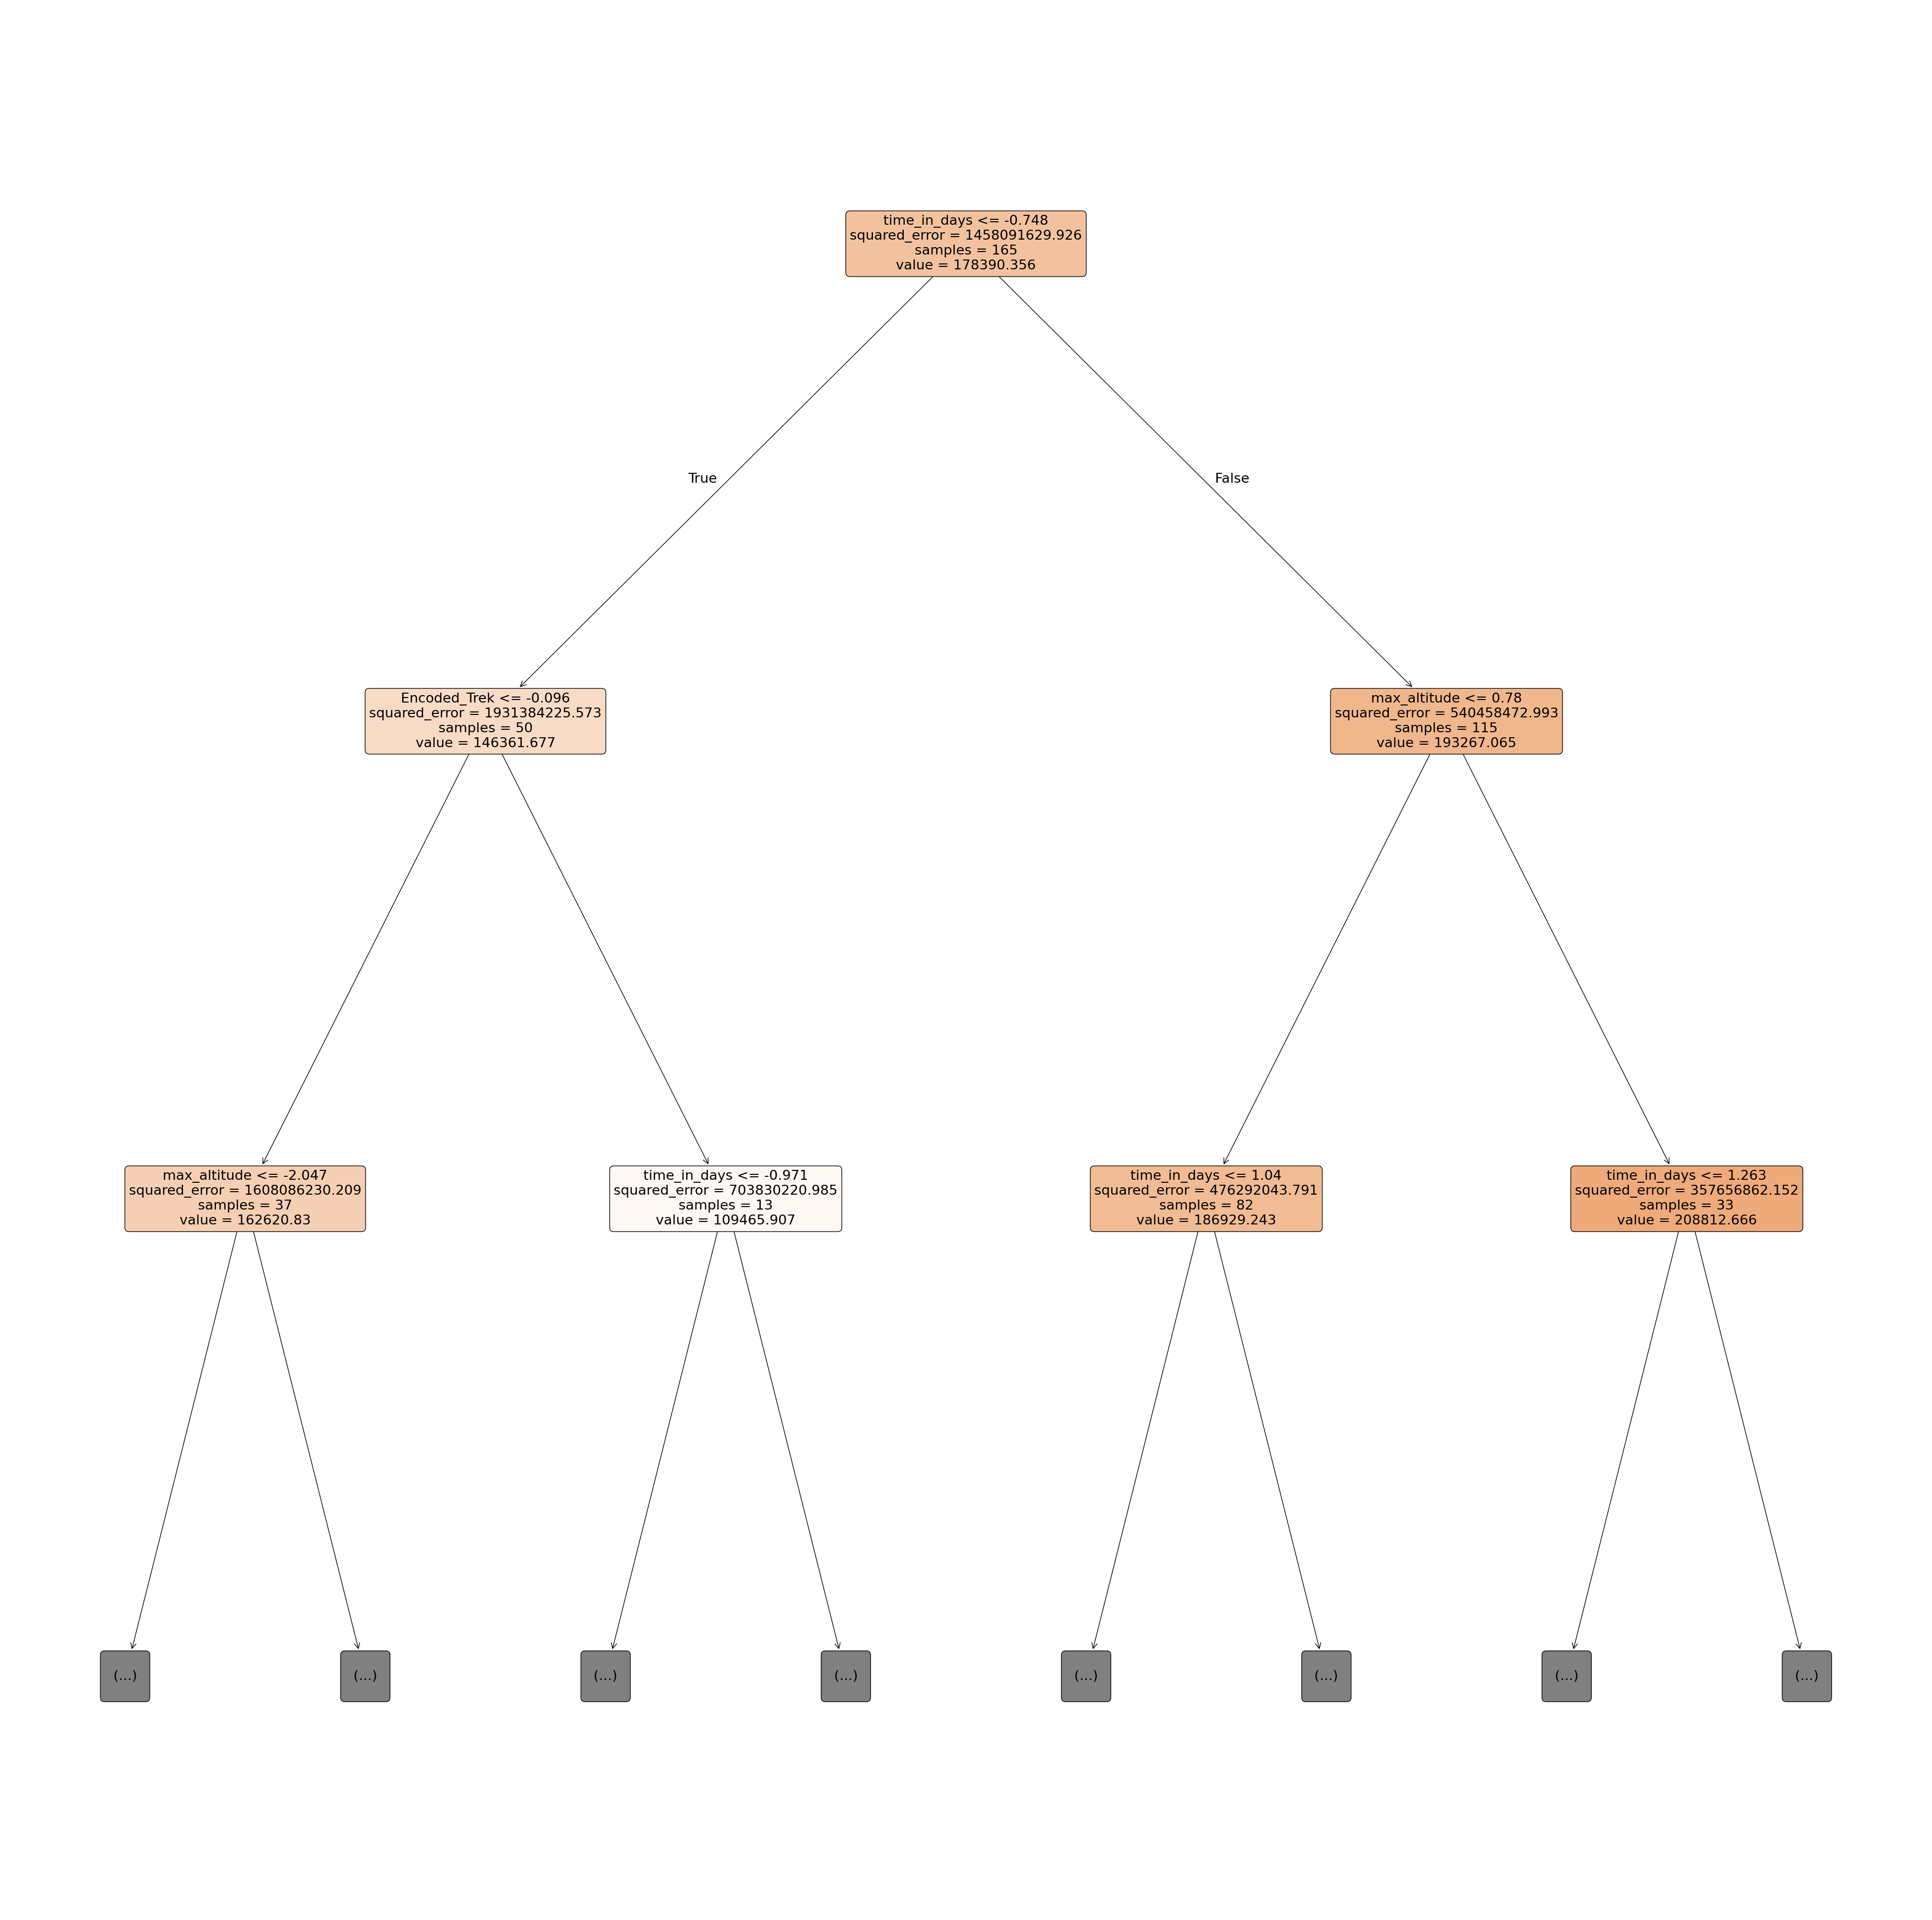

In [ ]:
from sklearn.tree import plot_tree

# Plot the first tree in the random forest
plt.figure(figsize=(50,50))
plot_tree(rfr_model.estimators_[0],
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          max_depth=2)
plt.show()

### `Training model using HyperParameter Tuning and Cross Validation`

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples in a leaf node
}

In [ ]:
random_search = RandomizedSearchCV(rfr_model, param_grid, n_iter=10, cv=10, random_state=42, n_jobs=1)
random_search.fit(X_train_scaled, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
best_model = random_search.best_estimator_
y_pred2 = best_model.predict(X_test_scaled)

mae_tuned = mean_absolute_error(y_pred2, Y_test)
mse_tuned = mean_squared_error(y_pred2, Y_test)
r2_tuned = r2_score(y_pred2, Y_test)

print(f'Mean Absolute Error: {mae_base}')
print(f'Mean Squared Error: {mse_tuned}')
print(f'R Squared: {r2_tuned * 100}')

Mean Absolute Error: 3538.748296767235
Mean Squared Error: 41785262.77974284
R Squared: 94.84701863777208


In [ ]:

base_model_metrics = [mse_base, r2_base]
tuned_model_metrics = [mse_tuned, r2_tuned]


fig = go.Figure()

# MSE bars
fig.add_trace(go.Bar(
    name='MSE (Base Model)',
    x=['Mean Squared Error'],
    y=[mse_base],
    marker_color='blue',
    yaxis='y1',  # Assign to first y-axis
    text=base_model_metrics
))

fig.add_trace(go.Bar(
    name='MSE (Tuned Model)',
    x=['Mean Squared Error'],
    y=[mse_tuned],
    marker_color='green',
    yaxis='y1',  # Assign to first y-axis
    text=tuned_model_metrics
))

# R² bars
fig.add_trace(go.Bar(
    name='R² (Base Model)',
    x=['R² Score'],
    y=[r2_base * 100],  # Converting R² to percentage for better scaling
    marker_color='blue',
    yaxis='y2',  # Assign to second y-axis
    text=[f'{r2_base * 100:.2f}%'],  # Formatting as a percentage with two decimals
    textposition='auto'
))

fig.add_trace(go.Bar(
    name='R² (Tuned Model)',
    x=['R² Score'],
    y=[r2_tuned * 100],  # Converting R² to percentage for better scaling
    marker_color='green',
    yaxis='y2',
    text=[f'{r2_tuned * 100:.2f}%'],  # Formatting as a percentage with two decimals
    textposition='auto'
))

# Updating layout with dual y-axes
fig.update_layout(
    title='Comparison of Base Model vs Tuned Model Metrics',
    xaxis_title='Metric',
    yaxis=dict(title='Mean Squared Error', titlefont=dict(color='blue'), showgrid=True, gridcolor='LightGray'),
    yaxis2=dict(title='R² Score (%)', titlefont=dict(color='green'), overlaying='y', side='right'),
    barmode='group'
)

fig.show()


> ## <span style="color:blue"> XG Boost </span>

In [ ]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_scaled, Y_train)
y_pred3 = xg_reg.predict(X_test_scaled)

xg_mae = mean_absolute_error(y_pred3, Y_test)
xg_mse = mean_squared_error(y_pred3, Y_test)
xg_r2 = r2_score(y_pred3, Y_test)


print(f'Mean Absolute Error: {xg_mae}')
print(f'Mean Squared Error: {xg_mse}')
print(f'R Squared: {xg_r2 * 100}')

Mean Absolute Error: 1761.10888671875
Mean Squared Error: 31330042.0
R Squared: 96.42938375473022


In [ ]:
import plotly.graph_objects as go

scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=Y_test,
                                 mode="markers",
                                 marker=dict(color="blue", size=8),
                                 name="Actual"))

scatter_fig.add_trace(go.Scatter(x=Y_test,
                                 y=y_pred3,
                                 mode="markers",
                                 marker=dict(color="orange", size=8),
                                 name="Predicted"))

scatter_fig.add_trace(go.Scatter(x=[Y_test.min(), Y_test.max()],
                                 y=[Y_test.min(), Y_test.max()],
                                 mode='lines',
                                 line=dict(color='green', dash='dash'),
                                 name='Perfect Prediction'))


scatter_fig.update_layout(title='Actual vs Predicted Values',
                          xaxis_title='Actual Values',
                          yaxis_title='Predicted Values')

scatter_fig.show()


In [ ]:
data = {
    "Model": ["Linear Regression", "Random Forest (Tuned)", "XGBoost"],
    "R2 Score": [r2 * 100, r2_tuned * 100, xg_r2 * 100]  # Convert to percentages
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plot bar chart
fig = px.bar(df, x="Model", y="R2 Score", title="R² Scores of Different Models (Percentage)", text="R2 Score", color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(yaxis_title="R² Score (%)", xaxis_title="Model", title_x=0.5)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')  # Format text as percentages
fig.show()

> ## <span style="color:blue">New Data Prediction</span>

In [ ]:
print(new_data.head())

            Encoded_Trek  cost_in_npr  time_in_days  Encoded_Trip_Grade  \
Unnamed: 0                                                                
18                     0     114070.0             8                   2   
166                    0     114070.0             8                   2   
240                    0     114070.0             8                   2   
314                    0     114070.0             8                   2   
92                     0     114070.0             8                   2   

            max_altitude  
Unnamed: 0                
18                4200.0  
166               4200.0  
240               4200.0  
314               4200.0  
92                4200.0  


In [ ]:
feature

,Encoded_Trek,time_in_days,Encoded_Trip_Grade,max_altitude
Unnamed: 0,,,,
18,0,8,2,4200.0
166,0,8,2,4200.0
240,0,8,2,4200.0
314,0,8,2,4200.0
92,0,8,2,4200.0
...,...,...,...,...
118,11,17,2,3870.0
340,11,17,2,3870.0
44,11,17,2,3870.0


In [ ]:
row = feature.iloc[50]
row

,93
Encoded_Trek,0.0
time_in_days,18.0
Encoded_Trip_Grade,0.0
max_altitude,5416.0


In [ ]:
row_reshaped = row.values.reshape(1, -1)

In [ ]:
row_reshaped

array([[   0.,   18.,    0., 5416.]])

In [ ]:
scaler.transform(row_reshaped)

array([[-0.81635607,  0.7044556 , -0.72325553,  0.71653075]])

In [ ]:
xg_reg.predict(scaler.transform(row_reshaped))

array([181170.17], dtype=float32)

In [ ]:
# pip install ipywidgets


In [ ]:
# import ipywidgets as widgets
# from IPython.display import display
# import numpy as np

# # Defining input widgets for each feature
# encoded_trek_widget = widgets.FloatText(value=3.0, description='Trek:', layout=widgets.Layout(width='200px'))
# time_in_days_widget = widgets.FloatText(value=18.0, description='Time in Days:', layout=widgets.Layout(width='200px'))
# encoded_trip_grade_widget = widgets.FloatText(value=0.0, description='Trip Grade:', layout=widgets.Layout(width='200px'))
# max_altitude_widget = widgets.FloatText(value=5416.0, description='Max Altitude:', layout=widgets.Layout(width='200px'))

# # Button to submit and capture input
# submit_button = widgets.Button(description="Submit", layout=widgets.Layout(width='200px'))

# # Output area for displaying the prediction
# output = widgets.Output()

# # Function to capture input values and make prediction when button is clicked
# def on_button_click(b):
#     with output:
#         output.clear_output()  # Clear previous output
#         # Capturing the input values
#         input_data = {
#             'Encoded_Trek': encoded_trek_widget.value,
#             'time_in_days': time_in_days_widget.value,
#             'Encoded_Trip_Grade': encoded_trip_grade_widget.value,
#             'max_altitude': max_altitude_widget.value
#         }

#         # Preparing the data in the format required by the model
#         input_values = np.array([[input_data['Encoded_Trek'],
#                                   input_data['time_in_days'],
#                                   input_data['Encoded_Trip_Grade'],
#                                   input_data['max_altitude']]])

#         # Making a prediction using the model
#         cost_prediction = rfr_model.predict(input_values)[0]

#         # Display the prediction
#         print("Predicted Cost (NPR):", cost_prediction)

# # Attach the function to the button click event
# submit_button.on_click(on_button_click)

# # Organize widgets in a vertical box layout
# input_widgets = widgets.VBox([encoded_trek_widget, time_in_days_widget, encoded_trip_grade_widget, max_altitude_widget, submit_button])

# # Display the input widgets and output area
# display(input_widgets, output)


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")